In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

set_label = ['50-25','75-37','100-50','125-67','150-75']
set_A_05 = ['1226_1700', '1226_1713', '1226_1727', '1226_1741', '1226_1756']
set_B_02 = ['0104_2223', '0104_2309', '0104_2328', '0104_2343', '0105_0013']
set_C_10 = ['0116_0117', '0116_0125', '0116_0132', '0116_0140', '0116_0149']
set_D_06 = ['0104_1949', '0104_2002', '0104_2016', '0104_2032', '0104_2056']

selected_set = set_C_10
set_name = './imagesets/B_S1_0.08.txt'
mertic = 7.5
mertic2 = 1.2

random.seed(114)
# B:8.04% -> 1.1
# D:9.15% -> 0.8

In [2]:
idx, scan_entropy_list, bev_entropy_list, pf_scalar_list, pf_vector_list, s1_gt =[], [], [], [], [], []
empty_file = []
sub_cnt = 0
for time_dirc in selected_set:
    sem_pt_path = '/home/newDisk/tool/carla_dataset_tool/raw_data/record_2024_'+time_dirc+'/vehicle.tesla.model3.master/velodyne_semantic/'
    file_list = os.listdir(sem_pt_path)
    file_list = [f for f in file_list if f.endswith('.txt')]
    file_list.sort()

    for file_name in file_list:
        gt = 0
        with open(sem_pt_path+file_name, 'r') as f:
            lines = f.readlines()
            last_line = lines[-1]
            if len(lines) ==1:
                empty_file.append(str(sub_cnt)+file_name[-9:-4])
            else:
                scores = last_line.split(' ')
                s1_gt.append(scores[0])
                scan_entropy_list.append(np.float64(scores[1]))
                bev_entropy_list.append(np.float64(scores[2]))
                pf_scalar_list.append(np.float64(scores[3]))
                pf_vector_list.append(np.float64(scores[4].replace('\n','')))
                idx.append(str(sub_cnt)+file_name[-9:-4])

    sub_cnt += 1


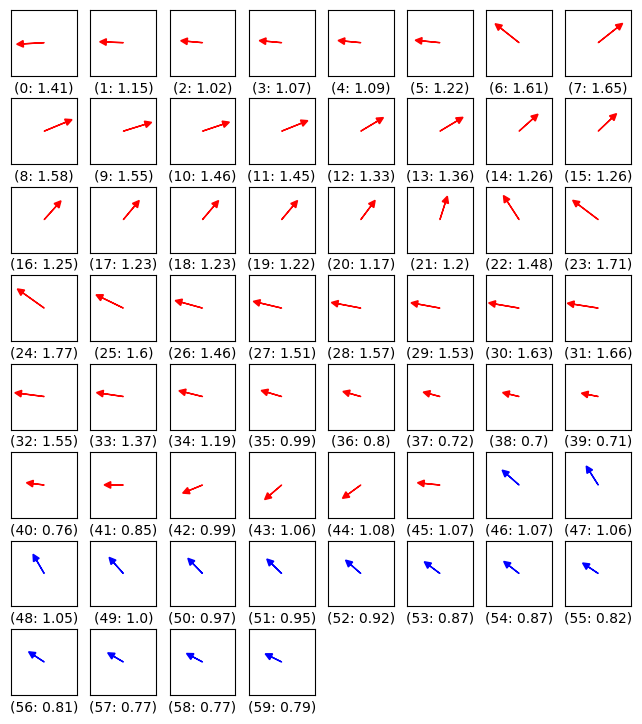

In [20]:
start = 1200
all_show_count = 60
max_val = max(pf_scalar_list[start:start + all_show_count])
draw_scaler = pf_scalar_list[start:start + all_show_count] / max_val
draw_vector = pf_vector_list[start:start + all_show_count]

row = 8
col = 8
fig, ax = plt.subplots(row, col, figsize=(8, 9))

last_scalar = 0
last_vector = 0

for i in range(row):
    for j in range(col):
        if i * col + j >= all_show_count:
            # 不显示多余的子图
            ax[i, j].axis('off')
            
        else:    
            # 子图需要为正方形
            ax[i, j].set_aspect('equal')

            ax[i, j].set_xlim(0, 1)
            ax[i, j].set_ylim(0, 1)
            # 不显示坐标轴上的刻度
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            # 为子图添加标题，在每张图的正下方
            num = draw_scaler[i*col+j].round(4)
            dire = draw_vector[i*col+j].round(4) # 弧度制角度
            ax[i, j].set_title(('({}: {})').format(i*col+j,(num*max_val).round(2)), fontsize=10, loc='center', y=-0.37)
            # 绘制箭头, 长度为num，方向为dire
            # 计算与上一个向量的余弦相似度
            # ax[i, j].arrow(0.5, 0.5, num*np.cos(dire)*0.4, num*np.sin(dire)*0.4, head_width=0.1, head_length=0.1, fc='b', ec='b')
            
            #cos_sim = np.dot([num, dire], [last_scalar, last_vector]) / (np.linalg.norm([num, dire]) * np.linalg.norm([last_scalar, last_vector]))
            # 余弦相似度>0.8时，箭头颜色为红色，否则为蓝色
            if i * col + j >45 and i * col + j < 73:
                ax[i, j].arrow(0.5, 0.5, num*np.cos(dire)*0.4, num*np.sin(dire)*0.4, head_width=0.1, head_length=0.1, fc='b', ec='b')
            elif i * col + j > 133 and i * col + j < 152:
                ax[i, j].arrow(0.5, 0.5, num*np.cos(dire)*0.4, num*np.sin(dire)*0.4, head_width=0.1, head_length=0.1, fc='g', ec='g')
            else:
                ax[i, j].arrow(0.5, 0.5, num*np.cos(dire)*0.4, num*np.sin(dire)*0.4, head_width=0.1, head_length=0.1, fc='r', ec='r')   
                # last_scalar = num
                # last_vector = dire

plt.show()
